# Maximum Drawdown and Calmar Ratio

## Getting ready

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
returns.info()

In [ ]:
returns.cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

## Maximum Drawdown

In [ ]:
symbol = "USD_GBP"

In [ ]:
returns[symbol].cumsum().apply(np.exp).plot(figsize = (12, 8))
plt.show()

In [ ]:
instr = returns[symbol].to_frame().copy()
instr

In [ ]:
instr["creturns"] = instr.cumsum().apply(np.exp) # cumulative returns (normalized prices with Base == 1)

In [ ]:
instr["cummax"] = instr.creturns.cummax() # cumulative maximum of creturns

In [ ]:
instr

In [ ]:
instr[["creturns", "cummax"]].plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
instr["drawdown"] = -(instr["creturns"] - instr["cummax"]) / instr["cummax"] # (pos.) drawdown (in %)
instr

In [ ]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

In [ ]:
max_drawdown = instr.drawdown.max() # maximum drawdown
max_drawdown

In [ ]:
instr.drawdown.idxmax() # maximum drawdown date 

In [ ]:
instr.loc[instr.drawdown.idxmax()]

In [ ]:
(0.941169 - 1.127116) / 1.127116

## Calmar Ratio

In [ ]:
max_drawdown

In [ ]:
cagr = np.exp(instr[symbol].sum())**(1/((instr.index[-1] - instr.index[0]).days / 365.25)) - 1 
cagr

In [ ]:
calmar = cagr / max_drawdown
calmar

## Max Drawdown Duration

In [ ]:
instr

In [ ]:
instr[["creturns", "cummax", "drawdown"]].plot(figsize = (15, 8), fontsize = 13, secondary_y = "drawdown")
plt.legend(fontsize = 13)
plt.show()

In [ ]:
drawdown = instr.drawdown.copy()
drawdown

- Drawdown Period: Time Period between peaks 
- recall: whenever drawdown == 0, a new peak has been reached

In [ ]:
begin = drawdown[drawdown == 0].index # get all peak dates (beginning of Drawdown periods)
begin

In [ ]:
end = begin[1:] # get the corresponding end dates for all Drawdown periods
end = end.append(pd.DatetimeIndex([drawdown.index[-1]])) # add last available date
end

In [ ]:
periods = end - begin # time difference between peaks
periods

In [ ]:
max_ddd = periods.max() # max drawdown duration
max_ddd

In [ ]:
max_ddd.days

## Putting everything together

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
returns = pd.read_csv("returns.csv", index_col = "Date", parse_dates = ["Date"])
returns

In [ ]:
def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    max_dd = drawdown.max()
    return max_dd

In [ ]:
returns.apply(max_drawdown).sort_values()

In [ ]:
def calculate_cagr(series):
    return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1

In [ ]:
def calmar(series):
    
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = calculate_cagr(series)
        calmar = cagr / max_dd
        return calmar

In [ ]:
returns.apply(calmar).sort_values(ascending = False)

In [ ]:
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    
    begin = drawdown[drawdown == 0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    periods = end - begin
    max_ddd = periods.max()
    return max_ddd.days   

In [ ]:
returns.apply(max_dd_duration).sort_values()

-----------------------

## Coding Challenge

__Calculate and compare__ <br>
- __Maximum Drawdown__
- __Calmar Ratio__
- __Maximum Drawdown Duration__ <br>

for __30 large US stocks__ that currently form the Dow Jones Industrial Average Index ("Dow Jones") for the time period between April 2019 and June 2021.

__Hint:__ You can __import__ the price data from __"Dow_Jones.csv"__.
 

Determine the __best performing stock__ and the __worst performing stock__ according to the Calmar Ratio.

__Compare__ Calmar Ratio and Sharpe Ratio. Does the __ranking change__?

(Remark: Dividends are ignored here. Hence, for simplicity reasons, the Calmar Ratio is based on Price Returns only. As a consequence, dividend-paying stocks are getting penalized.) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.style.use('seaborn')
%matplotlib inline

In [186]:
def get_data(file, date_col):
    raw = pd.read_csv(file, parse_dates=[date_col], index_col=date_col)
    return raw

def nlog_returns(series):
    norm = raw.div(raw.iloc[0])
    returns = np.log(norm/norm.shift(1))
    returns.dropna(inplace=True)
    return returns

def calc_cagr(series):
    return np.exp(series.sum())**(1/((series.index[-1]-series.index[0]).days/365.25))-1

def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cmreturns = creturns.cummax()
    drawdown = (cmreturns-creturns)/cmreturns
    max_dd = drawdown.max()
    return max_dd

def calmar(series):
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = calc_cagr(series)
        return cagr/max_dd

def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cmreturns = creturns.cummax()
    drawdown = (cmreturns-creturns)/cmreturns
    begin = series[drawdown==0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    max_ddd = (end-begin).max()
    return max_ddd
        
def sharpe(series):
    td_year = series.count() / ((series.index[-1] - series.index[0]).days / 365.25)

    mu = series.mean() * td_year
    sigma = series.std() * np.sqrt(td_year)
    return mu/sigma

def sortino(series, TMR = 0):
    excess_returns = (series - TMR)
    downside_deviation = np.sqrt(np.mean(np.where(excess_returns < 0, excess_returns, 0)**2))
    if downside_deviation == 0:
        return np.nan
    else:
        sortino = (series.mean() - TMR) / downside_deviation * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))
        return sortino

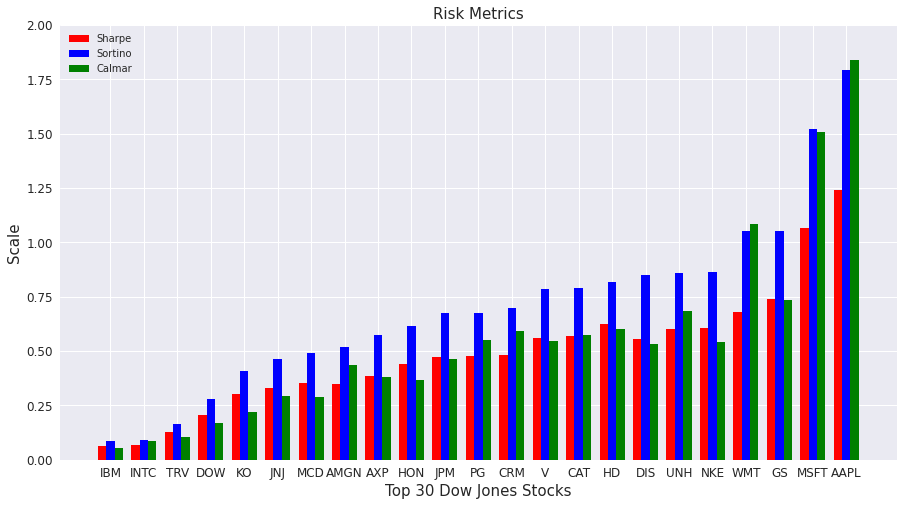

In [259]:
### %matplotlib inline
raw = get_data('Dow_Jones.csv', 'Date')

returns = nlog_returns(raw)
creturns = returns.cumsum().apply(np.exp)
results_frame = creturns.iloc[-1].to_frame().rename(columns={creturns.index[-1]:'Cumul. Returns'})
results_frame['Max DD'] = returns.apply(max_drawdown) #applies this function to each column
results_frame['Calmar'] = returns.apply(calmar).sort_values(ascending=False)
results_frame['Max DD Duration'] = returns.apply(max_dd_duration).sort_values(ascending=False)
results_frame['Sharpe'] = returns.apply(sharpe)
results_frame['Sortino'] = returns.apply(sortino)
results_frame = results_frame.loc[results_frame.Calmar >= 0].sort_values(by='Sortino', ascending=True).copy()

N = len(results_frame.index.values)
ind = np.arange(N)
w = 0.25
plt.figure(figsize=(15,8))
ax = plt.subplot(111)

#ax2 = plt.subplot(111)
#ax2 = ax.twinx()
#ax2.grid(visible=None)

plt.xlabel("Top 30 Dow Jones Stocks", fontsize=15)
plt.ylabel('Scale', fontsize=15)
plt.title("Risk Metrics", fontsize=15)

xvals = results_frame['Sharpe'].values
yvals = results_frame['Sortino'].values
zvals = results_frame['Calmar'].values


bar1 = ax.bar(ind-w, xvals, width=w, color = 'red', align='center')
bar2 = ax.bar(ind, yvals, width=w, color = 'blue', align='center')


#bar3 = ax2.bar(ind+w, zvals, width=w, color='green', align='center') #no second axis is needed
bar3 = ax.bar(ind+w, zvals, width=w, color='green', align='center')
plt.xticks(ind,results_frame.index.values, fontsize=12)
plt.yticks(fontsize=12)
plt.legend( (bar1, bar2, bar3), ('Sharpe', 'Sortino', 'Calmar'))
ax.set_ylim([0, 2])
#ax2.set_ylim([0, 2])
#ax2.tick_params( axis ='y', labelcolor = 'blue', bottom=True)

plt.show()


In [222]:
results_frame.sort_values(by='Sharpe')

,Cumul. Returns,Max DD,Calmar,Max DD Duration,Sharpe,Sortino
BA,0.626092,0.759991,-0.252137,802 days,-0.334131,-0.463188
WBA,0.857300,0.465561,-0.145106,580 days,-0.179464,-0.246252
CVX,0.864175,0.571992,-0.112180,798 days,-0.147890,-0.198223
MRK,0.949239,0.278574,-0.083957,529 days,-0.091907,-0.126516
MMM,0.950080,0.463007,-0.049665,783 days,-0.074511,-0.099110
VZ,0.967676,0.195425,-0.075815,542 days,-0.073673,-0.106034
CSCO,0.985267,0.428079,-0.015698,700 days,-0.020259,-0.027359
IBM,1.046964,0.395445,0.053278,494 days,0.064666,0.086562
INTC,1.067511,0.355776,0.084669,507 days,0.068972,0.092298
TRV,1.110346,0.472389,0.103093,602 days,0.129859,0.164778


In [195]:
np.arange(4)

array([0, 1, 2, 3])

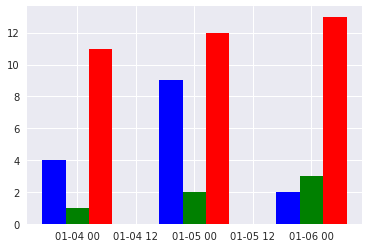

In [196]:
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import datetime

x = [
    datetime.datetime(2011, 1, 4, 0, 0),
    datetime.datetime(2011, 1, 5, 0, 0),
    datetime.datetime(2011, 1, 6, 0, 0)
]
x = date2num(x)

y = [4, 9, 2]
z = [1, 2, 3]
k = [11, 12, 13]

ax = plt.subplot(111)
ax.bar(x-0.2, y, width=0.2, color='b', align='center')
ax.bar(x, z, width=0.2, color='g', align='center')
ax.bar(x+0.2, k, width=0.2, color='r', align='center')
ax.xaxis_date()

plt.show()

In [211]:
results_frame[['Sharpe', 'Sortino', 'Calmar']].apply(np.min).min()

-0.4631881735293531

In [209]:
results_frame[['Sharpe', 'Sortino', 'Calmar']].apply(np.max).max()

1.838882159182616

## +++ Please stop here in case you don´t want to see the solution!!! +++++

## Coding Challenge Solution

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("Dow_Jones.csv", index_col = "Date", parse_dates = ["Date"])
df

In [ ]:
returns = np.log(df / df.shift()) # log returns
returns

__Maximum Drawdown__

In [ ]:
def max_drawdown(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    max_dd = drawdown.max()
    return max_dd

In [ ]:
returns.apply(max_drawdown).sort_values()

__Calmar Ratio__

In [ ]:
def calculate_cagr(series):
    return np.exp(series.sum())**(1/((series.index[-1] - series.index[0]).days / 365.25)) - 1

In [ ]:
def calmar(series):
    
    max_dd = max_drawdown(series)
    if max_dd == 0:
        return np.nan
    else:
        cagr = calculate_cagr(series)
        calmar = cagr / max_dd
        return calmar

In [ ]:
calm = returns.apply(calmar).sort_values(ascending = False)
calm

Best Performing Stock: __Apple__ (AAPL) <br>
Worst Performing Stock: __Non-determinable__ (note: you can´t compare negative Calmar Ratios)

__Maximum Drawdown Duration__

In [ ]:
def max_dd_duration(series):
    creturns = series.cumsum().apply(np.exp)
    cummax = creturns.cummax()
    drawdown = (cummax - creturns)/cummax
    
    begin = drawdown[drawdown == 0].index
    end = begin[1:]
    end = end.append(pd.DatetimeIndex([drawdown.index[-1]]))
    periods = end - begin
    max_ddd = periods.max()
    return max_ddd.days 

In [ ]:
returns.apply(max_dd_duration).sort_values()

In [ ]:
def sharpe(series, rf = 0):
    
    if series.std() == 0:
        return np.nan
    else:
        return (series.mean() - rf) / series.std() * np.sqrt(series.count() / ((series.index[-1] - series.index[0]).days / 365.25))

In [ ]:
sha = returns.apply(sharpe).sort_values(ascending = False)
sha

In [ ]:
merged = pd.concat([calm, sha], axis = 1)
merged

In [ ]:
merged.columns = ["Calmar", "Sharpe"]

In [ ]:
merged.rank(ascending = False)

-> Some Differences. __Salesforce (CRM) gets better ranked__ with Calmar (-4) while __The Nike gets penalized__ by Calmar (+5).